<a href="https://colab.research.google.com/github/khixson1/Crop_Recommendations/blob/main/Final_Crop_Recommendations_Production_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Crop Recommendations Machine Learning Exercise to predict best crop to grow in a given information such as fertilizer needs, humidity, rainfall, pH and temperature





Kim Hixson

# Crop_recommendations

**Source of Data:** (https://www.kaggle.com/atharvaingle/crop-recommendation-dataset)

**Brief description of data:** Precision agriculture is in trend nowadays. It helps the farmers to get informed decision about the farming strategy. Here, I present you a dataset which would allow the users to build a predictive model to recommend the most suitable crops to grow in a particular farm based on various parameters. This dataset was build by augmenting datasets of rainfall, climate and fertilizer data available for India.

**What is the target?** What they refer to as 'label' is a column of various crops

**Is this a classification or regression problem?** Both

**How many features?** Eight features(columns)

**How many rows of data?** 2200 rows of data

**Anticipated challenges:** Few to none. The data appear to have no missing data and are already aligned for machine learning with 1 object column which serves as a target.

In [ ]:
#Imports common to python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

#Imports needed for transformations and preprocessing
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#Imports for common classifier models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, RocCurveDisplay, r2_score, roc_curve
from sklearn.base import BaseEstimator

#Cross Validation imports
from sklearn.model_selection import GridSearchCV

#Import visualizaiton for pipelines
from sklearn import set_config
set_config(display='diagram')

In [ ]:
# Mount google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Upload data and view info

filename = '/content/drive/MyDrive/Colab Notebooks/Coding Dojo/DataScience_Stack2/Week_7_MachineLearning_ClassificationModels/Data_Uploads/Crop_recommendation.csv'

df_crop = pd.read_csv(filename)

display(df_crop.info())
display(df_crop.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


None

(2200, 8)

In [ ]:
# Display the head of the dataset

display(df_crop.head())

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


# Preprocessing Steps

1. deleted unnecessary columns

2. deleted duplicate rows

3. identified and addressed missing values 

4. identified and corrected inconsistencies in data for categorical values (i.e. Cat, cat, cats)

5. produced univariate visuals for the target and all features

6. identified outliers

7. produce a correlation heatmap and identify any moderate or strong correlations between your target and your features and/or between one feature and another

8. clearly commented all of your cleaning steps and described any decisions you made  (Note: During the final stack of the program, you will be making a presentation for a technical audience that includes your decisions and process in the cleaning steps. 


In [ ]:
# Check for unnecessary columns
display(df_crop.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


None

All columns appear to be necessary in this dataset. There is no need to drop any columns.

In [ ]:
# Delete duplicated rows

# Check for duplicates
df_crop.duplicated().sum()

0

There appear to be no duplicated rows.  No row removal is needed.

In [ ]:
# Identify and address missing values

# Check for missing values
df_crop.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

There are no missing values

In [ ]:
# Identified and correct inconsistencies in data for categorical values (i.e. Cat, cat, cats)

# Check for inconsistencies in catagorical values

display(df_crop['label'].value_counts())
display(df_crop['label'].nunique())
display(df_crop['label'].unique())

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

22

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

The only object column contains 22 classes. There seem to be no inconsistancies in the data categories

In [ ]:
# Convert our target vector ('label') into numbers

crop_dict = {'rice':0, 'maize':1, 'chickpea':2, 'kidneybeans':3, 'pigeonpeas':4,
       'mothbeans':5, 'mungbean':6, 'blackgram':7, 'lentil':8, 'pomegranate':9,
       'banana':10, 'mango':11, 'grapes':12, 'watermelon':13, 'muskmelon':14, 'apple':15,
       'orange':16, 'papaya':17, 'coconut':18, 'cotton':19, 'jute':20, 'coffee':21}

df_crop2 = df_crop.copy()
df_crop2['label']=df_crop['label'].replace(crop_dict)
df_crop2

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,0
1,85,58,41,21.770462,80.319644,7.038096,226.655537,0
2,60,55,44,23.004459,82.320763,7.840207,263.964248,0
3,74,35,40,26.491096,80.158363,6.980401,242.864034,0
4,78,42,42,20.130175,81.604873,7.628473,262.717340,0
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,21
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,21
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,21
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,21


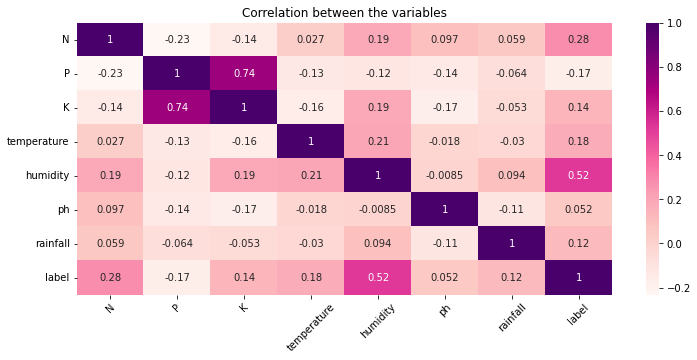

In [ ]:
# Produce a correlation heatmap and identify any moderate or strong correlations between your target and your features and/or between one feature and another

# Produce pairwise correlation matrix
corr = df_crop2.corr

# Plot Pairwise Correlations
plt.subplots(figsize=(12,5));
corr=df_crop2.corr();
sns.heatmap(corr,annot=True,cmap='RdPu');
plt.title('Correlation between the variables');
plt.xticks(rotation=45);

In [ ]:
# Produce univariate and multivariate visuals for the target and all features

#sns.pairplot(data=df_crop2); # remove the hashtag if wanting to rerun pairplot which is take a while

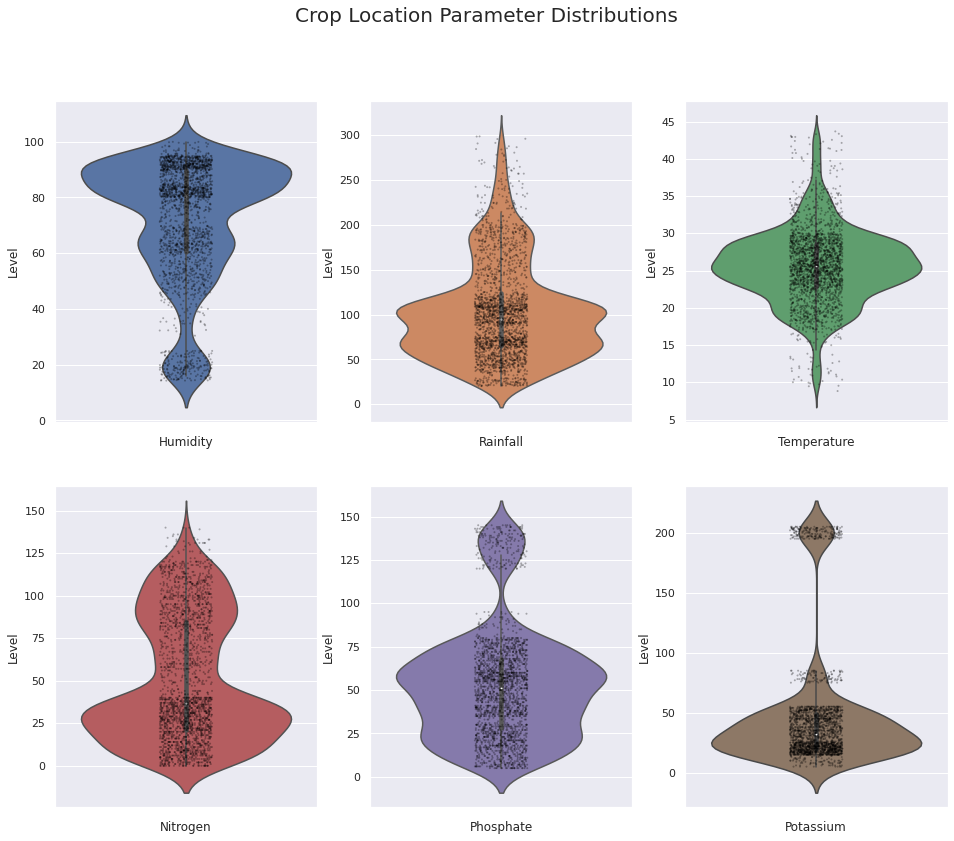

In [ ]:
from numpy.core.fromnumeric import size
#define plot attributes

#set seaborn plotting aesthetics as default
sns.set()
palette = itertools.cycle(sns.color_palette())

#define subplots
fig, axes = plt.subplots(2,3, figsize=(16,13))

#plot first subplot
ax1 = sns.violinplot(data = df_crop2, 
                    y='humidity', 
                    ax=axes[0,0], 
                    color = next(palette))
sns.stripplot(data = df_crop2,
              y = 'humidity',
              size=2,
              color="black", 
              marker = 'o', 
              alpha = 0.3,
              ax = axes[0,0]) 
ax1.set_ylabel('Level');
ax1.set_xlabel("Humidity", fontsize=12);

#plot 2nd subplot
ax2 = sns.violinplot(data = df_crop2,
                  y = 'rainfall',
                  ax = axes[0,1],
                  color= next(palette));
sns.stripplot(data = df_crop2,
              y = 'rainfall',
              size=2,
              color="black", 
              marker = 'o', 
              alpha = 0.3,
              ax = axes[0,1])
ax2.set_ylabel('Level');
ax2.set_xlabel("Rainfall", fontsize=12);

#plot 3rd subplot
ax3 = sns.violinplot(data = df_crop2,
                  y = 'temperature',
                  ax = axes[0,2],
                  color= next(palette));
sns.stripplot(data = df_crop2,
              y = 'temperature',
              size=2,
              color="black", 
              marker = 'o', 
              alpha = 0.3,
              ax = axes[0,2])
ax3.set_ylabel('Level');
ax3.set_xlabel("Temperature", fontsize=12);

#plot 4th subplot
ax4 = sns.violinplot(data = df_crop2,
                  y = 'N',
                  ax = axes[1,0],
                  color= next(palette));
sns.stripplot(data = df_crop2,
              y = 'N',
              size=2,
              color="black", 
              marker = 'o', 
              alpha = 0.3,
              ax = axes[1,0])
ax4.set_ylabel('Level');
ax4.set_xlabel("Nitrogen", fontsize=12);

#plot 5th subplot
ax5 = sns.violinplot(data = df_crop2,
                  y = 'P',
                  ax = axes[1,1],
                  color= next(palette));
sns.stripplot(data = df_crop2,
              y = 'P',
              size=2,
              color="black", 
              marker = 'o', 
              alpha = 0.3,
              ax = axes[1,1])
ax5.set_ylabel('Level');
ax5.set_xlabel("Phosphate", fontsize=12);

#plot 6th subplot
ax6 = sns.violinplot(data = df_crop2,
                  y = 'K',
                  ax = axes[1,2],
                  color= next(palette));
sns.stripplot(data = df_crop2,
              y = 'K',
              size=2,
              color="black", 
              marker = 'o', 
              alpha = 0.3,
              ax = axes[1,2])
ax6.set_ylabel('Level');
ax6.set_xlabel("Potassium", fontsize=12);

#add title above all subplots
fig.suptitle("Crop Location Parameter Distributions", size=20);

In [ ]:
# Convert our target vector numbers back into labels

crop_dict2 = {0:'rice', 1:'maize', 2:'chickpea', 3:'kidneybeans', 4:'pigeonpeas',
       5:'mothbeans', 6:'mungbean', 7:'blackgram', 8:'lentil', 9:'pomegranate',
       10:'banana', 11:'mango', 12:'grapes', 13:'watermelon', 14:'muskmelon', 15:'apple',
       16:'orange', 17:'papaya', 18:'coconut', 19:'cotton', 20:'jute', 21:'coffee'}

df_crop2['crop']=df_crop2['label'].replace(crop_dict2)

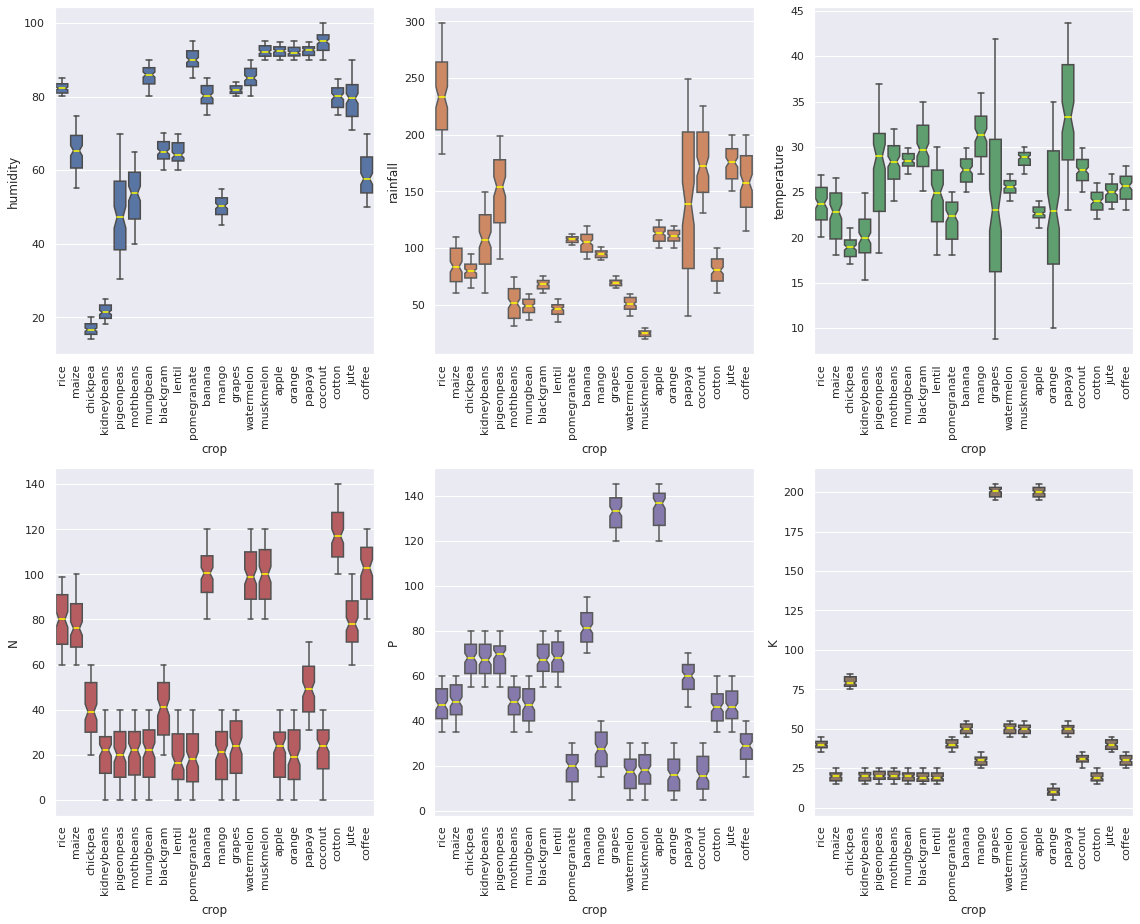

In [ ]:
# Show Distributions of Features for Each Crop

#define plot attributes
palette = itertools.cycle(sns.color_palette())

#define subplots
fig, axes = plt.subplots(2,3, figsize=(16,13))
ax1 = sns.boxplot(data = df_crop2,
                  x='crop',
                  y='humidity',
                  ax=axes[0,0],
                  notch=True,
                  medianprops=dict(color="yellow"),
                  color = next(palette))
ax1.set_xticklabels(df_crop2['crop'].unique(), rotation=90)
ax2 = sns.boxplot(data = df_crop2,
                  x='crop',
                  y = 'rainfall',
                  ax=axes[0,1],
                  notch=True,
                  medianprops=dict(color="yellow"),
                  color = next(palette))
ax2.set_xticklabels(df_crop2['crop'].unique(), rotation=90)
ax3 = sns.boxplot(data = df_crop2,
                  x='crop',
                  y = 'temperature',
                  ax=axes[0,2],
                  notch=True,
                  medianprops=dict(color="yellow"),
                  color = next(palette))
ax3.set_xticklabels(df_crop2['crop'].unique(), rotation=90)
ax4 = sns.boxplot(data = df_crop2,
                  x='crop',
                  y = 'N',
                  ax=axes[1,0],
                  notch=True,
                  medianprops=dict(color="yellow"),
                  color = next(palette))
ax4.set_xticklabels(df_crop2['crop'].unique(), rotation=90)
ax5 = sns.boxplot(data = df_crop2,
                  x='crop',
                  y = 'P',
                  ax=axes[1,1],
                  notch=True,
                  medianprops=dict(color="yellow"),
                  color = next(palette))
ax5.set_xticklabels(df_crop2['crop'].unique(), rotation=90)
ax6 = sns.boxplot(data = df_crop2,
                  x='crop',
                  y = 'K',
                  ax=axes[1,2],
                  notch=True,
                  medianprops=dict(color="yellow"),
                  color = next(palette))
ax6.set_xticklabels(df_crop2['crop'].unique(), rotation=90)

fig.tight_layout()
plt.show()

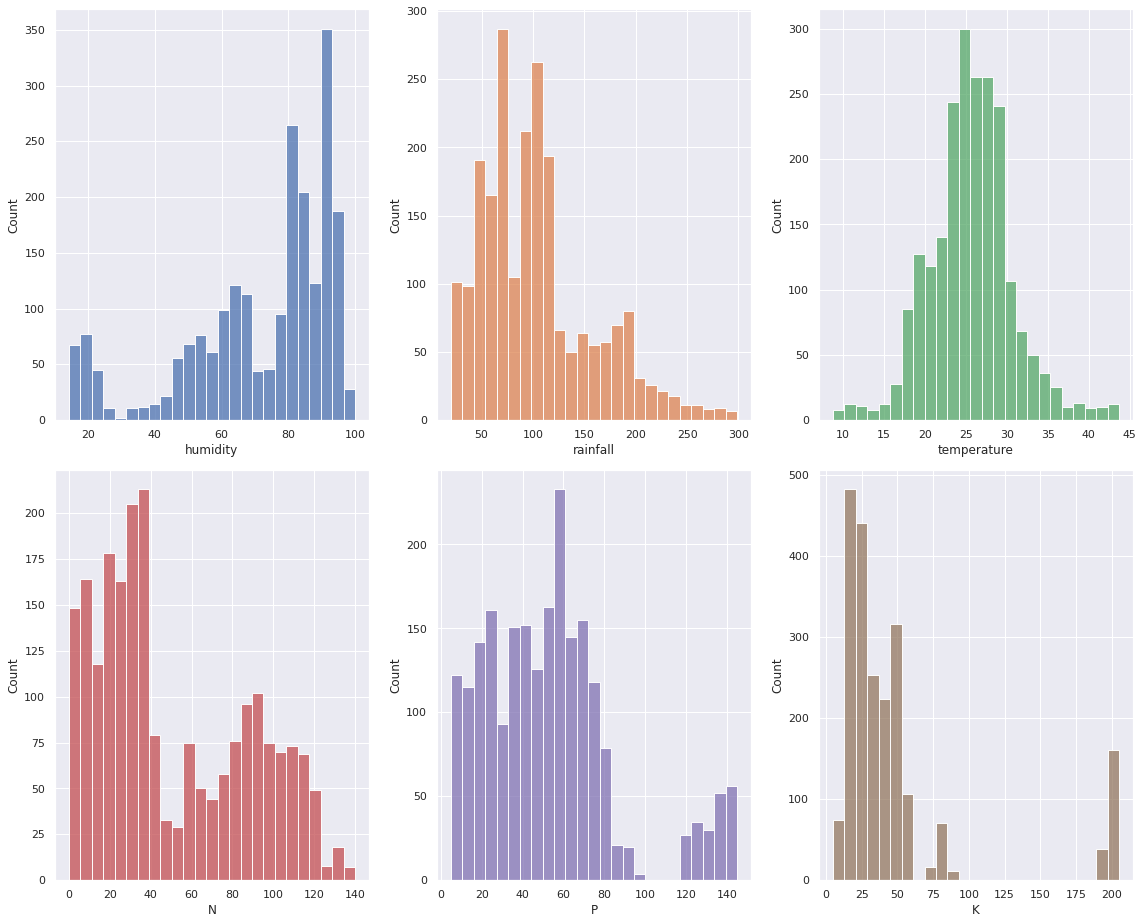

In [ ]:
# Show Histogram Distributions of Features for Each Crop

#define plot attributes
palette = itertools.cycle(sns.color_palette())

#define subplots
fig, axes = plt.subplots(2,3, figsize=(16,13))
ax1 = sns.histplot(data = df_crop2,
                  x='humidity',
                  ax=axes[0,0],
                  bins=25,
                  color = next(palette))
ax2 = sns.histplot(data = df_crop2,
                  x='rainfall',
                  ax=axes[0,1],
                  bins=25,
                  color = next(palette))
ax3 = sns.histplot(data = df_crop2,
                  x='temperature',
                  ax=axes[0,2],
                  bins=25,
                  color = next(palette))
ax4 = sns.histplot(data = df_crop2,
                  x='N',
                  ax=axes[1,0],
                  bins=25,
                  color = next(palette))
ax3 = sns.histplot(data = df_crop2,
                  x='P',
                  ax=axes[1,1],
                  bins=25,
                  color = next(palette))
ax3 = sns.histplot(data = df_crop2,
                  x='K',
                  ax=axes[1,2],
                  bins=25,
                  color = next(palette))

fig.tight_layout()
plt.show()

In [ ]:
# Identify outliers

# Check for outliers
df_crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


There appear to be no outliers in these data

Our target ('label') or crop is most highly correlated to humidity followed by nitrogen (N)


---

Potassium (K) and Phosphate (K) levels are also highly correlated

In [ ]:
# Check for balance between target ('label') classes

df_crop['label'].value_counts(normalize=True)

rice           0.045455
maize          0.045455
jute           0.045455
cotton         0.045455
coconut        0.045455
papaya         0.045455
orange         0.045455
apple          0.045455
muskmelon      0.045455
watermelon     0.045455
grapes         0.045455
mango          0.045455
banana         0.045455
pomegranate    0.045455
lentil         0.045455
blackgram      0.045455
mungbean       0.045455
mothbeans      0.045455
pigeonpeas     0.045455
kidneybeans    0.045455
chickpea       0.045455
coffee         0.045455
Name: label, dtype: float64

The crop classes in our 'label' or target vector are perfectly balanced

# Machine Learning Models
Here we will try out 3 classifier models: Random Forest, KNN Classifier and LightGBM boosting model and we will evaluate their accuracy

In [ ]:
#Define dataset for modeling
df = df_crop2.drop(columns='crop')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   int64  
dtypes: float64(4), int64(4)
memory usage: 137.6 KB


In [ ]:
# Selecting feature matrix (X) and the target vector (y)
X = df.drop(columns='label')
y = df['label']

In [ ]:
# Model validation (Train-Test-Split) to prevent data leakage. 
# No need to stratify because of perfectly balanced classes in target vector
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
# Separating out numeric and categorical columns
num_selector = make_column_selector(dtype_include='number')
cat_selector = make_column_selector(dtype_include='object')

In [ ]:
# Instantiate Transformers
scaler = StandardScaler()
le = LabelEncoder()

In [ ]:
# View categorical and numeric columns
num_data = X_train[num_selector(X_train)]
display(num_data.head())

,N,P,K,temperature,humidity,ph,rainfall
564,22,36,16,30.581395,50.771481,8.184229,64.585596
916,18,27,41,22.365094,92.308824,7.175344,104.821633
1700,61,68,50,35.214628,91.497251,6.793245,243.074507
436,26,72,22,28.767949,37.577921,4.674942,91.720849
1555,2,140,197,22.697801,92.822234,5.534567,105.050823


In [ ]:
# Make Pipelines for each column type
num_pipe = make_pipeline(scaler)

In [ ]:
# Match pipe to column
num_tuple = (num_pipe, num_selector)

In [ ]:
# Make column Transformer
col_trans = make_column_transformer(num_tuple, remainder = 'passthrough')
col_trans

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fd836117290>)])

#Create Classifier Model Pipelines

## Random Forest Classification Pipeline

In [ ]:
# Instantiate Random Forest Model
rf = RandomForestClassifier()

# Create a modeling pipeline
rf_pipe = make_pipeline(col_trans, rf)
rf_pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fd836117290>)])),
                ('randomforestclassifier', RandomForestClassifier())])

## K-Nearest Neighbors (KNN) Classification Pipeline

In [ ]:
# Instantiate KNN Classifier Model
knn = KNeighborsClassifier()

# Create a modeling pipeline
knn_pipe = make_pipeline(col_trans, knn)
knn_pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fd836117290>)])),
                ('kneighborsclassifier', KNeighborsClassifier())])

## LightGBM Boosting Classification Pipeline

In [ ]:
# Instantiate LightGBM Classifier Model
lgbm = LGBMClassifier()

# Create a modeling pipeline
lgbm_pipe = make_pipeline(col_trans, lgbm)
lgbm_pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fd836117290>)])),
                ('lgbmclassifier', LGBMClassifier())])

# Fitting Classifier Models To Training Data

In [ ]:
# Fit your pipelines on the training data

# Random Forest Classification
rf_pipe.fit(X_train, y_train)

# KNN Classification
knn_pipe.fit(X_train, y_train)

# LightGBM Classification
lgbm_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fd836117290>)])),
                ('lgbmclassifier', LGBMClassifier())])

# Evaluate Training and Testing Data for each Classifier with Default Settings

In [ ]:
# Random Forest Classifiation Accuracy
rf_train_accur = r2_score(y_train, rf_pipe.predict(X_train)).round(3)
rf_test_accur = r2_score(y_test, rf_pipe.predict(X_test)).round(3)

# Predict test data set
y_pred_rf = rf_pipe.predict(X_test)
y_prob_pred_rf = rf_pipe.predict_proba(X_test)

# Rename numbered classes by their crop name
crop_names = ['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean','blackgram','lentil','pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee']

# Checking performance our model with classification report.
print('Classification Report for Random Forest Classification')
print(classification_report(y_test, y_pred_rf, target_names=crop_names))
print('_________________________________________________________')
# Checking accuracy
print('Accuracy:')
print(f'Random Forest Train R2: {rf_train_accur}')
print(f'Random Forest Test R2: {rf_test_accur}')
print('_________________________________________________________')
# Checking ROC AUC with multiclass
roc_auc_rf = roc_auc_score(y_test, y_prob_pred_rf, multi_class='ovo', average='weighted')
print(f'Random Forest ROC AUC score: {roc_auc_rf.round(6)}')

Classification Report for Random Forest Classification
              precision    recall  f1-score   support

        rice       1.00      0.80      0.89        25
       maize       1.00      1.00      1.00        23
    chickpea       1.00      1.00      1.00        31
 kidneybeans       1.00      1.00      1.00        24
  pigeonpeas       1.00      1.00      1.00        34
   mothbeans       1.00      0.96      0.98        26
    mungbean       1.00      1.00      1.00        26
   blackgram       1.00      1.00      1.00        24
      lentil       0.94      1.00      0.97        15
 pomegranate       1.00      1.00      1.00        30
      banana       1.00      1.00      1.00        23
       mango       1.00      1.00      1.00        27
      grapes       1.00      1.00      1.00        19
  watermelon       1.00      1.00      1.00        21
   muskmelon       1.00      1.00      1.00        22
       apple       1.00      1.00      1.00        29
      orange       1.00   

In [ ]:
# KNN Classifiation Accuracy
knn_train_accur = r2_score(y_train, knn_pipe.predict(X_train)).round(3)
knn_test_accur = r2_score(y_test, knn_pipe.predict(X_test)).round(3)

# Predict test data set
y_pred_knn = knn_pipe.predict(X_test)
y_prob_pred_knn = knn_pipe.predict_proba(X_test)

# Checking performance our model with classification report.
print('Classification Report for KNN Classification')
print(classification_report(y_test, y_pred_knn, target_names=crop_names))
print('_________________________________________________________')
# Checking accuracy
print('Accuracy:')
print(f'KNN Train R2: {knn_train_accur}')
print(f'KNN Forest Test R2: {knn_test_accur}')
print('_________________________________________________________')
# Checking ROC AUC with multiclass
roc_auc_knn = roc_auc_score(y_test, y_prob_pred_knn, multi_class='ovo', average='weighted')
print(f'K-Nearest Neighbors ROC AUC score: {roc_auc_knn.round(6)}')

Classification Report for KNN Classification
              precision    recall  f1-score   support

        rice       0.94      0.68      0.79        25
       maize       1.00      0.91      0.95        23
    chickpea       1.00      1.00      1.00        31
 kidneybeans       0.92      1.00      0.96        24
  pigeonpeas       1.00      0.88      0.94        34
   mothbeans       1.00      0.88      0.94        26
    mungbean       1.00      1.00      1.00        26
   blackgram       0.92      0.96      0.94        24
      lentil       0.79      1.00      0.88        15
 pomegranate       0.97      1.00      0.98        30
      banana       1.00      1.00      1.00        23
       mango       1.00      1.00      1.00        27
      grapes       1.00      1.00      1.00        19
  watermelon       1.00      1.00      1.00        21
   muskmelon       1.00      1.00      1.00        22
       apple       1.00      1.00      1.00        29
      orange       1.00      0.95   

In [ ]:
# LightGBM Classifiation Accuracy
lgbm_train_accur = r2_score(y_train, lgbm_pipe.predict(X_train)).round(3)
lgbm_test_accur = r2_score(y_test, lgbm_pipe.predict(X_test)).round(3)

# Predict test data set
y_pred_lgbm = lgbm_pipe.predict(X_test)
y_prob_pred_lgbm = lgbm_pipe.predict_proba(X_test)

# Checking performance our model with classification report.
print('Classification Report for LightGBM Classifier')
print(classification_report(y_test, y_pred_lgbm, target_names=crop_names))
print('_________________________________________________________')
# Checking accuracy
print('Accuracy:')
print(f'LightGBM Train R2: {lgbm_train_accur}')
print(f'LightGBM Forest Test R2: {lgbm_test_accur}')
print('_________________________________________________________')
# Checking ROC AUC with multiclass
roc_auc_lgbm = roc_auc_score(y_test, y_prob_pred_lgbm, multi_class='ovo', average='weighted')
print(f'LightGBM ROC AUC score: {roc_auc_lgbm.round(6)}')

Classification Report for LightGBM Classifier
              precision    recall  f1-score   support

        rice       0.95      0.80      0.87        25
       maize       1.00      0.96      0.98        23
    chickpea       1.00      1.00      1.00        31
 kidneybeans       1.00      1.00      1.00        24
  pigeonpeas       1.00      0.94      0.97        34
   mothbeans       1.00      0.96      0.98        26
    mungbean       1.00      1.00      1.00        26
   blackgram       0.96      1.00      0.98        24
      lentil       0.94      1.00      0.97        15
 pomegranate       1.00      1.00      1.00        30
      banana       1.00      1.00      1.00        23
       mango       0.96      1.00      0.98        27
      grapes       1.00      1.00      1.00        19
  watermelon       1.00      1.00      1.00        21
   muskmelon       1.00      1.00      1.00        22
       apple       1.00      1.00      1.00        29
      orange       1.00      1.00  

##Random Forest Hyparameter Tuning

Random Forest Classification performed the best on the test set. The model however overfitted the training data a bit. Linear Regression performed the worst on both training and testing data.

The following parameters can be modified to reduce overfitting in random forest models:
1. n_estimators: The more trees, the less likely the algorithm is to overfit. ...
2. max_features: You should try reducing this number. ...
3. max_depth: This parameter will reduce the complexity of the learned models, lowering over fitting risk.
4. min_samples_leaf: Try setting these values greater than one.

In [ ]:
# Use GridSearchCV to test for optimal parameters combinations in Random Forest Classification Model

# Create the parameter grid based on the results of random search 
param_grid_rf = {
    'bootstrap': [True],
    'max_depth': [80, 100, 120],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 12, 16],
    'n_estimators': [100, 300, 500, 1000]
}

# Instantiate the grid search model
grid_search_rf = GridSearchCV(estimator = rf, param_grid = param_grid_rf, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
# Fit the grid search to the data, time the execution, use the best parameters to make the new model
%%time
grid_search_rf.fit(X_train, y_train)
display(grid_search_rf.best_params_)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


{'bootstrap': True,
 'max_depth': 80,
 'max_features': 2,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 300}

CPU times: user 9.23 s, sys: 649 ms, total: 9.88 s
Wall time: 12min 32s


In [ ]:
# Instantiate Random Forest Model
rf_new = RandomForestClassifier(**grid_search_rf.best_params_)

# Create a modeling pipeline
rf_new_pipe = make_pipeline(col_trans, rf_new)
rf_new_pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fd836117290>)])),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=80, max_features=2,
                                        min_samples_leaf=3, min_samples_split=8,
                                        n_estimators=300))])

In [ ]:
# Fit new model and print accuracy for training and testing datasets
# Random Forest Classification
rf_new_pipe.fit(X_train, y_train)

rf_new_Train_ac = r2_score(y_train, rf_new_pipe.predict(X_train)).round(3)
rf_new_Test_ac = r2_score(y_test, rf_new_pipe.predict(X_test)).round(3)

print(f'Random Forest Train R2: {rf_new_Train_ac}')
print(f'Random Forest Test R2: {rf_new_Test_ac}')

Random Forest Train R2: 0.988
Random Forest Test R2: 0.895


##K-Nearest Neighbors Classifier Hyparameter Tuning

In [ ]:
# Use GridSearchCV to test for optimal parameters combinations in KNN Classification Model

# Create the parameter grid based on the results of random search 
param_grid_knn = {
    'leaf_size': list(range(1,50,1)),
    'n_neighbors': list(range(1,30,1)),
    'p': [1, 2, 3]
}

# Instantiate the grid search model
grid_search_knn = GridSearchCV(estimator = knn, param_grid = param_grid_knn, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
# Fit the grid search to the data, time the execution, use the best parameters to make the new model
%%time
grid_search_knn.fit(X_train, y_train)
display(grid_search_knn.best_params_)

Fitting 3 folds for each of 4263 candidates, totalling 12789 fits


{'leaf_size': 1, 'n_neighbors': 3, 'p': 2}

CPU times: user 29 s, sys: 1.03 s, total: 30 s
Wall time: 7min 47s


In [ ]:
# Instantiate new KNN Classifier Model
knn_new = KNeighborsClassifier(**grid_search_knn.best_params_)

# Create a modeling pipeline
knn_new_pipe = make_pipeline(col_trans, knn_new)
knn_new_pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fd836117290>)])),
                ('kneighborsclassifier',
                 KNeighborsClassifier(leaf_size=1, n_neighbors=3))])

In [ ]:
# Fit new model and print accuracy for training and testing datasets
# KNN Classification
knn_new_pipe.fit(X_train, y_train)

knn_new_Train_ac = r2_score(y_train, knn_new_pipe.predict(X_train)).round(3)
knn_new_Test_ac = r2_score(y_test, knn_new_pipe.predict(X_test)).round(3)

print(f'K-Neighbors Train R2: {knn_new_Train_ac}')
print(f'K-Neighbors Test R2: {knn_new_Test_ac}')

K-Neighbors Train R2: 0.958
K-Neighbors Test R2: 0.844


##LightGBM Classifier Hyparameter Tuning

In [ ]:
# Use GridSearchCV to test for optimal parameters combinations in LightGBM Classification Model

# Create the parameter grid based on the results of random search 
param_grid_lgbm = {
    'num_leaves': list(range(20,100,20)),
    'min_child_samples': list(range(5,15,5)),
    'max_depth': [-1,5,10,20],
    'learning_rate':[0.05,0.1,0.2],
    'reg_alpha':[0,0.01,0.03]
}

# Instantiate the grid search model
grid_search_lgbm = GridSearchCV(estimator = lgbm, param_grid = param_grid_lgbm, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
# Fit the grid search to the data, time the execution, use the best parameters to make the new model
%%time
grid_search_lgbm.fit(X_train, y_train)
display(grid_search_lgbm.best_params_)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


{'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 5,
 'num_leaves': 20,
 'reg_alpha': 0.01}

CPU times: user 9.67 s, sys: 476 ms, total: 10.1 s
Wall time: 13min 9s


In [ ]:
# Instantiate new KNN Classifier Model
lgbm_new = LGBMClassifier(**grid_search_lgbm.best_params_)

# Create a modeling pipeline
lgbm_new_pipe = make_pipeline(col_trans, lgbm_new)
lgbm_new_pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fd836117290>)])),
                ('lgbmclassifier',
                 LGBMClassifier(min_child_samples=5, num_leaves=20,
                                reg_alpha=0.01))])

In [ ]:
# Fit new model and print accuracy for training and testing datasets
# KNN Classification
lgbm_new_pipe.fit(X_train, y_train)

lgbm_new_Train_ac = r2_score(y_train, lgbm_new_pipe.predict(X_train)).round(3)
lgbm_new_Test_ac = r2_score(y_test, lgbm_new_pipe.predict(X_test)).round(3)

print(f'LightGBM Train R2: {lgbm_new_Train_ac}')
print(f'LightGBM Test R2: {lgbm_new_Test_ac}')

LightGBM Train R2: 1.0
LightGBM Test R2: 0.878


#Evaluation of Tuned Models

In [ ]:
# Random Forest Classifiation Accuracy
rf_train_accur2 = r2_score(y_train, rf_new_pipe.predict(X_train)).round(3)
rf_test_accur2 = r2_score(y_test, rf_new_pipe.predict(X_test)).round(3)

# Predict test data set
y_pred_rf_new = rf_new_pipe.predict(X_test)
y_prob_pred_rf_new = rf_new_pipe.predict_proba(X_test)

# Checking performance our model with classification report.
print('Classification Report for Random Forest Classification')
print(classification_report(y_test, y_pred_rf_new, target_names=crop_names))
print('_________________________________________________________')
# Checking accuracy
print('Accuracy:')
print(f'Random Forest Train R2: {rf_train_accur2}')
print(f'Random Forest Test R2: {rf_test_accur2}')
print('_________________________________________________________')
# Checking ROC AUC with multiclass
roc_auc_rf_new = roc_auc_score(y_test, y_prob_pred_rf_new, multi_class='ovo', average='weighted')
print(f'Random Forest ROC AUC score: {roc_auc_rf_new.round(6)}')

Classification Report for Random Forest Classification
              precision    recall  f1-score   support

        rice       1.00      0.76      0.86        25
       maize       1.00      1.00      1.00        23
    chickpea       1.00      1.00      1.00        31
 kidneybeans       1.00      1.00      1.00        24
  pigeonpeas       1.00      1.00      1.00        34
   mothbeans       1.00      0.96      0.98        26
    mungbean       1.00      1.00      1.00        26
   blackgram       1.00      1.00      1.00        24
      lentil       0.94      1.00      0.97        15
 pomegranate       1.00      1.00      1.00        30
      banana       1.00      1.00      1.00        23
       mango       1.00      1.00      1.00        27
      grapes       1.00      1.00      1.00        19
  watermelon       1.00      1.00      1.00        21
   muskmelon       1.00      1.00      1.00        22
       apple       1.00      1.00      1.00        29
      orange       1.00   

In [ ]:
# KNN Classifiation Accuracy
knn_train_accur2 = r2_score(y_train, knn_new_pipe.predict(X_train)).round(3)
knn_test_accur2 = r2_score(y_test, knn_new_pipe.predict(X_test)).round(3)

# Predict test data set
y_pred_knn_new = knn_new_pipe.predict(X_test)
y_prob_pred_knn_new = knn_new_pipe.predict_proba(X_test)

# Checking performance our model with classification report.
print('Classification Report for KNN Classification')
print(classification_report(y_test, y_pred_knn_new, target_names=crop_names))
print('_________________________________________________________')
# Checking accuracy
print('Accuracy:')
print(f'KNN Train R2: {knn_train_accur2}')
print(f'KNN Forest Test R2: {knn_test_accur2}')
print('_________________________________________________________')
# Checking ROC AUC with multiclass
roc_auc_knn_new = roc_auc_score(y_test, y_prob_pred_knn_new, multi_class='ovo', average='weighted')
print(f'K-Nearest Neighbors ROC AUC score: {roc_auc_knn_new.round(6)}')

Classification Report for KNN Classification
              precision    recall  f1-score   support

        rice       1.00      0.72      0.84        25
       maize       0.96      0.96      0.96        23
    chickpea       1.00      1.00      1.00        31
 kidneybeans       0.92      1.00      0.96        24
  pigeonpeas       1.00      0.91      0.95        34
   mothbeans       1.00      0.88      0.94        26
    mungbean       1.00      1.00      1.00        26
   blackgram       0.96      0.96      0.96        24
      lentil       0.79      1.00      0.88        15
 pomegranate       1.00      1.00      1.00        30
      banana       1.00      1.00      1.00        23
       mango       1.00      1.00      1.00        27
      grapes       1.00      1.00      1.00        19
  watermelon       1.00      1.00      1.00        21
   muskmelon       1.00      1.00      1.00        22
       apple       1.00      1.00      1.00        29
      orange       1.00      1.00   

In [ ]:
# LightGBM Classifiation Accuracy
lgbm_train_accur2 = r2_score(y_train, lgbm_new_pipe.predict(X_train)).round(3)
lgbm_test_accur2 = r2_score(y_test, lgbm_new_pipe.predict(X_test)).round(3)

# Predict test data set
y_pred_lgbm_new = lgbm_new_pipe.predict(X_test)
y_prob_pred_lgbm_new = lgbm_new_pipe.predict_proba(X_test)

# Checking performance our model with classification report.
print('Classification Report for LightGBM Classifier')
print(classification_report(y_test, y_pred_lgbm_new, target_names=crop_names))
print('_________________________________________________________')
# Checking accuracy
print('Accuracy:')
print(f'LightGBM Train R2: {lgbm_train_accur2}')
print(f'LightGBM Forest Test R2: {lgbm_test_accur2}')
print('_________________________________________________________')
# Checking ROC AUC with multiclass
roc_auc_lgbm_new = roc_auc_score(y_test, y_prob_pred_lgbm_new, multi_class='ovo', average='weighted')
print(f'LightGBM ROC AUC score: {roc_auc_lgbm_new.round(6)}')

Classification Report for LightGBM Classifier
              precision    recall  f1-score   support

        rice       0.95      0.80      0.87        25
       maize       1.00      0.96      0.98        23
    chickpea       1.00      1.00      1.00        31
 kidneybeans       1.00      1.00      1.00        24
  pigeonpeas       1.00      0.94      0.97        34
   mothbeans       1.00      0.96      0.98        26
    mungbean       1.00      1.00      1.00        26
   blackgram       0.96      1.00      0.98        24
      lentil       0.94      1.00      0.97        15
 pomegranate       1.00      1.00      1.00        30
      banana       1.00      1.00      1.00        23
       mango       0.96      1.00      0.98        27
      grapes       1.00      1.00      1.00        19
  watermelon       1.00      1.00      1.00        21
   muskmelon       1.00      1.00      1.00        22
       apple       1.00      1.00      1.00        29
      orange       1.00      1.00  

# Side by side comparison of ROC AUC scores

In [ ]:
# Random Forest Baseline versus Tuned Model ROC AUC Scores
# Checking ROC AUC with multiclass
roc_auc_rf = roc_auc_score(y_test, y_prob_pred_rf, multi_class='ovo', average='weighted')
print(f'Baseline Random Forest ROC AUC score: {roc_auc_rf.round(6)}')
roc_auc_rf_new = roc_auc_score(y_test, y_prob_pred_rf_new, multi_class='ovo', average='weighted')
print(f'Tuned Random Forest ROC AUC score: {roc_auc_rf_new.round(6)}')

Baseline Random Forest ROC AUC score: 0.999892
Tuned Random Forest ROC AUC score: 0.9999


In [ ]:
# K-Nearest Neighbors Classifier Baseline versus Tuned Model ROC AUC Scores
# Checking ROC AUC with multiclass
roc_auc_knn = roc_auc_score(y_test, y_prob_pred_knn, multi_class='ovo', average='weighted')
print(f'Baseline K-Nearest Neighbors ROC AUC score: {roc_auc_knn.round(6)}')
roc_auc_knn_new = roc_auc_score(y_test, y_prob_pred_knn_new, multi_class='ovo', average='weighted')
print(f'Tuned K-Nearest Neighbors ROC AUC score: {roc_auc_knn_new.round(6)}')

Baseline K-Nearest Neighbors ROC AUC score: 0.995121
Tuned K-Nearest Neighbors ROC AUC score: 0.989666


In [ ]:
# LightGBM Classifier Baseline versus Tuned Model ROC AUC Scores
# Checking ROC AUC with multiclass
roc_auc_lgbm = roc_auc_score(y_test, y_prob_pred_lgbm, multi_class='ovo', average='weighted')
print(f'Baseline LightGBM ROC AUC score: {roc_auc_lgbm.round(6)}')
roc_auc_lgbm_new = roc_auc_score(y_test, y_prob_pred_lgbm_new, multi_class='ovo', average='weighted')
print(f'Tuned LightGBM ROC AUC score: {roc_auc_lgbm_new.round(6)}')

Baseline LightGBM ROC AUC score: 0.99982
Tuned LightGBM ROC AUC score: 0.99982


# The 'Production Model' selected is the Random Forest Classifier model with hyperparameter tuning which was determined using GridSearchCV. Ideal hyperparameter settings were determined to be:
1. 'max_depth' =  80
2. 'max_features' = 2
3. 'min_samples_leaf' = 3
4. 'min_samples_split' = 8
5. 'n_estimators' = 300

This model had the highest testing dataset accuracy, had the highest ROC AUC score, and only had trouble classifying crops rice, mothbeans, lentils and jute with F-scores less than 1.0.

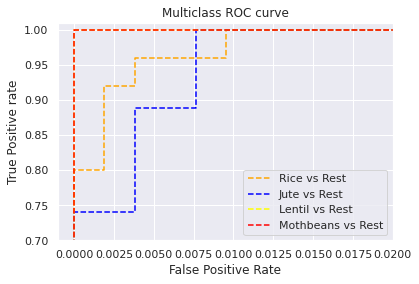

In [ ]:
# roc curve for one versus rest class comparisons for rice, mothbeans, lentils, and jute
fpr = {}
tpr = {}
thresh ={}

n_class = 22

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_prob_pred_rf_new[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Rice vs Rest')
plt.plot(fpr[20], tpr[20], linestyle='--',color='blue', label='Jute vs Rest')
plt.plot(fpr[8], tpr[8], linestyle='--',color='yellow', label='Lentil vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='red', label='Mothbeans vs Rest')

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.xlim(-0.001,0.02)
plt.ylim(0.7,1.01)
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);  